# Spotify Songs Emotions

In [ ]:
# The google.colab module is only available in Google Colab environments.
# If you are running this notebook locally (e.g., Jupyter Notebook, VS Code), you do not need to mount Google Drive.
# If you want to access files, use standard file paths or upload files manually.

# Example: If you need to access a local file, just use its path directly.
# df = pd.read_csv('path/to/your/local/file.csv')

ModuleNotFoundError: No module named 'google.colab'

# Import libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
import os
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn import set_config
from sklearn.model_selection import GridSearchCV
from tensorflow import keras
from scikeras.wrappers import KerasRegressor

In [6]:
df = pd.read_csv(r'D:\MLops\Github projects\Emotion-Based-Music-Recommender\dataset\278k_labelled_uri.csv')

In [7]:
df.sample(3)

,Unnamed: 0.1,Unnamed: 0,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels,uri
163180,163180,163180,235987.0,0.445,0.3840,-14.642,0.0417,0.635,0.000077,0.0539,0.216,123.295,1.767046e-07,0,spotify:track:3ZE3wv8V3w2T2f7nOCjV0N
118017,118017,118017,196537.0,0.471,0.0985,-22.367,0.0378,0.966,0.917000,0.1460,0.173,119.819,1.923302e-07,3,spotify:track:2WV63cJoapM6BNN22RvxZF
196816,196816,196816,147929.0,0.514,0.1730,-12.660,0.0413,0.733,0.924000,0.1070,0.180,215.684,2.791880e-07,3,spotify:track:2FyFsPKhv0wNQ9nhTSM1Vs


In [8]:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [9]:
df.sample(5)

,Unnamed: 0.1,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels,uri
277771,277771,570733.0,0.379,0.782,-8.163,0.0358,0.04720,0.748000,0.265,0.5490,101.698,6.272635e-08,0,spotify:track:3cSlU4ZH4wzb5pM7wI1k3f
44870,44870,256173.0,0.551,0.835,-7.101,0.9370,0.68900,0.000000,0.792,0.4350,117.293,3.657684e-06,1,spotify:track:2yGW59d94dNOf90TKTyPhD
168086,168086,265560.0,0.488,0.871,-9.447,0.0781,0.00472,0.000776,0.676,0.5180,118.986,2.940955e-07,2,spotify:track:4cgSBnNzOo9rhwzUczB7HI
41558,41558,256800.0,0.283,0.236,-16.134,0.0440,0.95000,0.053600,0.388,0.0456,127.360,1.713396e-07,0,spotify:track:6xWtXXoXeG1MgSG9oqG9vf
40631,40631,187120.0,0.107,0.282,-11.530,0.0408,0.36000,0.657000,0.102,0.1040,73.854,2.180419e-07,0,spotify:track:1WvX1J8vS5Jt9AXBnDtC3e


In [10]:
# Check total records and columns
print('Total records in dataset = ',df.shape[0])
print('Total columns in dataset = ',df.shape[1])

Total records in dataset =  277938
Total columns in dataset =  14


<Axes: xlabel='labels'>

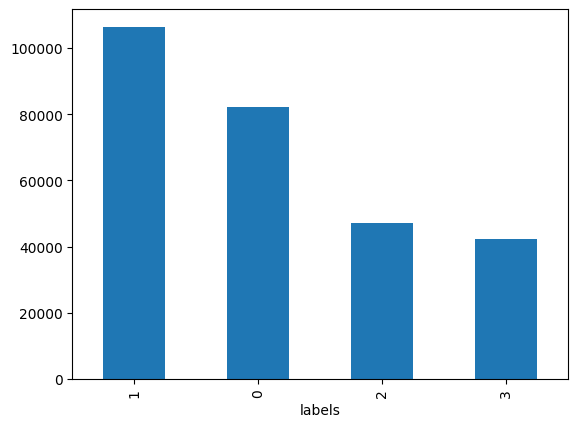

In [11]:
# Plot number of records of every label
df['labels'].value_counts().plot(kind='bar')

<Axes: >

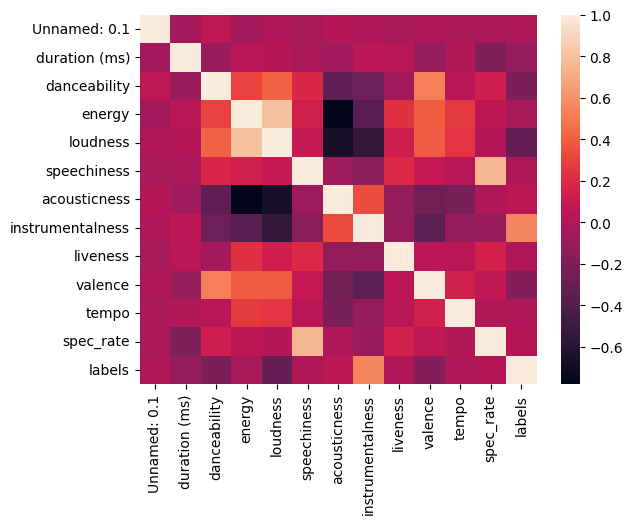

In [13]:
# Only use numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr())

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277938 entries, 0 to 277937
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0.1      277938 non-null  int64  
 1   duration (ms)     277938 non-null  float64
 2   danceability      277938 non-null  float64
 3   energy            277938 non-null  float64
 4   loudness          277938 non-null  float64
 5   speechiness       277938 non-null  float64
 6   acousticness      277938 non-null  float64
 7   instrumentalness  277938 non-null  float64
 8   liveness          277938 non-null  float64
 9   valence           277938 non-null  float64
 10  tempo             277938 non-null  float64
 11  spec_rate         277938 non-null  float64
 12  labels            277938 non-null  int64  
 13  uri               277938 non-null  object 
dtypes: float64(11), int64(2), object(1)
memory usage: 29.7+ MB


# Try Different Models

In [15]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(columns = ['labels'] , axis = 1) , df['labels'] , test_size = 0.3, random_state=10)

In [16]:
x_train.shape

(194556, 13)

In [17]:
x_train.head(2)

,Unnamed: 0.1,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,uri
71481,71481,393750.0,0.766,0.816,-9.054,0.130,0.0233,0.878000,0.0986,0.0334,128.003,3.301587e-07,spotify:track:6kaIc67rCSgpZdEjnPnwd6
251375,251375,192000.0,0.645,0.869,-3.343,0.122,0.0160,0.000022,0.4160,0.5060,144.962,6.354167e-07,spotify:track:0ZDe2L8BCIrEE1OBtM3b4T


In [ ]:
tf1_lr = ColumnTransformer([('Nan Imputer' , SimpleImputer(missing_values = np.nan , strategy = 'most_frequent') , slice(0,11))])
tf2_lr = ColumnTransformer([('Standard Scaler', StandardScaler(), slice(0,11))])
svm = SVC(kernel='linear')


pipe_svm = Pipeline([('Nan Imputer',tf1_lr),('StandardScaler',tf2_lr),('Support Vector Machine',svm)])

pipe_svm.fit(x_train,y_train)

# Calculate the accuracy of the classifier
y_pred_svm = pipe_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy_svm)

set_config(display='diagram')
pipe_svm

In [ ]:
tf1_dtc = ColumnTransformer([('Nan Imputer' , SimpleImputer(missing_values = np.nan , strategy = 'most_frequent') , slice(0,11))])
tf2_dtc = ColumnTransformer([('Standard Scaler', StandardScaler(), slice(0,11))])
dtc = DecisionTreeClassifier()


pipe_dtc = Pipeline([('Nan Imputer',tf1_dtc),('StandardScaler',tf2_dtc),('Decision Tree Classifier',dtc)])

pipe_dtc.fit(x_train,y_train)

# Calculate the accuracy of the classifier
y_pred_dtc = pipe_dtc.predict(x_test)
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
print("Accuracy:", accuracy_dtc)

set_config(display='diagram')
pipe_dtc

Accuracy: 0.9058070087069151


Pipeline(steps=[('Nan Imputer',
                 ColumnTransformer(transformers=[('Nan Imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  slice(0, 11, None))])),
                ('StandardScaler',
                 ColumnTransformer(transformers=[('Standard Scaler',
                                                  StandardScaler(),
                                                  slice(0, 11, None))])),
                ('Decision Tree Classifier', DecisionTreeClassifier())])

In [ ]:
tf1_rfc = ColumnTransformer([('Nan Imputer' , SimpleImputer(missing_values = np.nan , strategy = 'most_frequent') , slice(0,11))])
tf2_rfc = ColumnTransformer([('Standard Scaler', StandardScaler(), slice(0,11))])
rfc = RandomForestClassifier()


pipe_rfc = Pipeline([('Nan Imputer',tf1_rfc),('StandardScaler',tf2_rfc),('Random Forest Classifier',rfc)])

pipe_rfc.fit(x_train,y_train)

# Calculate the accuracy of the classifier
y_pred_rfc = pipe_rfc.predict(x_test)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print("Accuracy:", accuracy_rfc)

set_config(display='diagram')
pipe_rfc

Accuracy: 0.9420498428917512


Pipeline(steps=[('Nan Imputer',
                 ColumnTransformer(transformers=[('Nan Imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  slice(0, 11, None))])),
                ('StandardScaler',
                 ColumnTransformer(transformers=[('Standard Scaler',
                                                  StandardScaler(),
                                                  slice(0, 11, None))])),
                ('Random Forest Classifier', RandomForestClassifier())])

In [ ]:
tf1_xgc = ColumnTransformer([('Nan Imputer' , SimpleImputer(missing_values = np.nan , strategy = 'most_frequent') , slice(0,11))])
tf2_xgc = ColumnTransformer([('Standard Scaler', StandardScaler(), slice(0,11))])
xgc = XGBClassifier()


pipe_xgc = Pipeline([('Nan Imputer',tf1_xgc),('StandardScaler',tf2_xgc),('XG Boost Classifier',xgc)])

pipe_xgc.fit(x_train,y_train)

# Calculate the accuracy of the classifier
y_pred_xgc = pipe_xgc.predict(x_test)
accuracy_xgc = accuracy_score(y_test, y_pred_xgc)
print("Accuracy:", accuracy_xgc)

set_config(display='diagram')
pipe_xgc

Accuracy: 0.966047828068408


Pipeline(steps=[('Nan Imputer',
                 ColumnTransformer(transformers=[('Nan Imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  slice(0, 11, None))])),
                ('StandardScaler',
                 ColumnTransformer(transformers=[('Standard Scaler',
                                                  StandardScaler(),
                                                  slice(0, 11, None))])),
                ('Random Forest Classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None,...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

# Best Accurcy is given by XGBoost Classifier which is 96.60 %